# Matrices en Numpy

Basado en documento de la libreria [Numpy](https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html)

Importamos la librería Numpy con nombre "np".

In [ ]:
import numpy as np

## Matriz por filas

Para crear un arreglo en forma de matriz de 2 dimensiones (filas y columnas), se realiza así

In [ ]:
A = np.array([[1,2,3],[4,5,6]])
print(A, A.shape)

[[1 2 3]
 [4 5 6]] (2, 3)


In [ ]:
A2 = np.asarray([[1,2,3],[4,5,6]])
print(A2, A2.shape)

[[1 2 3]
 [4 5 6]] (2, 3)


# Ampliando la matriz

## Agregando filas a una matriz


Si quiere agregar una nueva fila a una matriz:

In [ ]:
b = np.array([[7,8,9]])
# axis=0 - concatena a lo largo de las filas
print(np.concatenate((A, b), axis=0))

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
print(np.vstack((A, b)))

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
# axis=0 - concatenate a lo largo de las filas
np.append(A, b, axis=0)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

## Agregando Columnas a una matriz


In [ ]:
c = np.array([[7],[8]])
# c = np.array([[7,8]]).T
# axis=0 - concatena a lo largo de las columnas
print(np.concatenate((A, c), axis=1))

[[1 2 3 7]
 [4 5 6 8]]


In [ ]:
print(np.hstack((A,c)))

[[1 2 3 7]
 [4 5 6 8]]


In [ ]:
# axis=0 - concatena a lo largo de las columnas
print(np.append(A, c, axis=1))

[[1 2 3 7]
 [4 5 6 8]]


# Medidas sobre matrices $R^{N\times N}\rightarrow R$



## Determinante

In [ ]:
Ac = np.append(A, b, axis=0)
np.linalg.det(Ac)

0.0

## Rango

In [ ]:
np.linalg.matrix_rank(Ac)

2

## Norma

In [ ]:
np.linalg.norm(Ac)

16.881943016134134

In [ ]:
np.sqrt(np.sum(Ac**2))

16.881943016134134

# Solucion a sistemas de ecuaciones

Sunpoga que se tiene el siguiente sistemas de ecuaciones: <br>
$x+3y+5z=10,$ <br>
$2x+5y+z=8,$ <br>
$2x+3y+8z=13$.

In [ ]:
A = np.array([[1, 3, 5],[2, 5, 1],[2,3,8]])
b = np.array([[10, 8, 13]]).T

In [ ]:
x1 = np.linalg.inv(A)@b
print(x1)

[[-0.48]
 [ 1.56]
 [ 1.16]]


In [ ]:
x2 = np.linalg.inv(A).dot(b)
print(x2)

[[-0.48]
 [ 1.56]
 [ 1.16]]


In [ ]:
x2 = np.linalg.solve(A,b)
print(x2)

[[-0.48]
 [ 1.56]
 [ 1.16]]


# Productos entre matrices

In [ ]:
A = np.array([[1, 3, 5],[2, 5, 1],[2,3,8]])
B = np.array([[2, 4, 1],[3, 6, 2],[7,2,5]])

In [ ]:
A@B

array([[46, 32, 32],
       [26, 40, 17],
       [69, 42, 48]])

In [ ]:
B@A

array([[12, 29, 22],
       [19, 45, 37],
       [21, 46, 77]])

In [ ]:
A.dot(B)

array([[46, 32, 32],
       [26, 40, 17],
       [69, 42, 48]])

In [ ]:
np.linalg.inv(A).dot(B) #A^(-1)B

array([[ 4.28000000e+00, -2.00000000e+00,  3.64000000e+00],
       [-1.16000000e+00,  2.00000000e+00, -1.08000000e+00],
       [ 2.40000000e-01,  4.16333634e-17,  1.20000000e-01]])

In [ ]:
np.linalg.solve(A,B)

array([[ 4.28, -2.  ,  3.64],
       [-1.16,  2.  , -1.08],
       [ 0.24,  0.  ,  0.12]])

Ejercicios:
Solucionar el siguiente circuito [enlace](http://hyperphysics.phy-astr.gsu.edu/hbasees/electric/imgele/dcx7.gif).




In [ ]:
#Hacer codigo aqui

## Funciones y Señales a partir de vectores

Numpy se emplea para hacer broadcasting sobre funciones de una forma vectorial, por ejemplo, si se tiene el vector x=[1,2,3,4], se puede obtener el cuadrado de cada elemento asi, x**2.

In [ ]:
x = np.array([1,2,3,4])
x2 = x**2
print(x2)

Ejercicio: realizar el problema de conversion de grados a Farenheit, donde los grados estan guardados en un arreglo de numpy usando la funcion arange.

In [ ]:
#Hacer codigo aqui

Numpy tambien se emplea para graficar vectores de funciones trigonometricas o señales en el tiempo. Por ejemplo:
$$
y(t) = A\cos(\omega t + \theta)
$$
donde $t$ es un vector en el tiempo.

In [3]:
A = 10
w = 60
theta = np.radians(45)
t = np.linspace(0,1,100) # arreglo
y = A*np.cos(w*t+theta)

In [4]:
import matplotlib.pyplot as plt

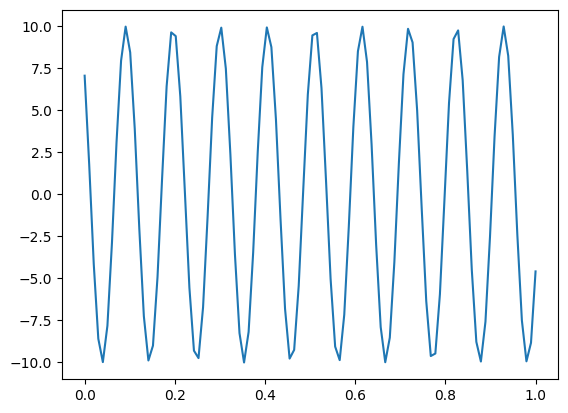

In [5]:
plt.plot(t,y)

Ejercicio: realizar el grafico de
$$
 f(t) = \exp(2*t)\sin(2\pi t)
$$
para $t$ entre [0,1] con 1000 valores.